installing the libraries

In [56]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

Importing the dataset

In [58]:
df = pd.read_csv('hotels_train.csv')

In [59]:
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [61]:
print("number of rows in the dataset: ", df.shape[0])
print("number of columns in the dataset: ", df.shape[1])

number of rows in the dataset:  27213
number of columns in the dataset:  18


convert columns with object type to int type

In [62]:
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

In [63]:
df['purchase_type'].value_counts()

purchase_type
Online           14306
Offline           6501
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

In [64]:
df['room_type'].value_counts()

room_type
1    21084
4     4571
6      741
2      511
5      180
7      123
3        3
Name: count, dtype: int64

In [65]:
df['board_type'].value_counts()

board_type
half board      14591
full board       2697
breakfast        1753
not selected        4
Name: count, dtype: int64

In [66]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

DateParseError: day is out of range for month: 2018-2-29, at position 206

In [ ]:
np.where(df['date'] =='2018-2-29')

In [ ]:
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')

In [ ]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

In [ ]:
df['month'] = df['date'].dt.month.astype(int)

In [ ]:
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']

In [ ]:
df['purchase_type'] = df['purchase_type'].astype('category')
df['is_canceled'] = df['is_canceled'].astype('category')

In [ ]:
df.describe()

In [ ]:
df.describe(include = 'object')

In [ ]:
df.isnull().sum()

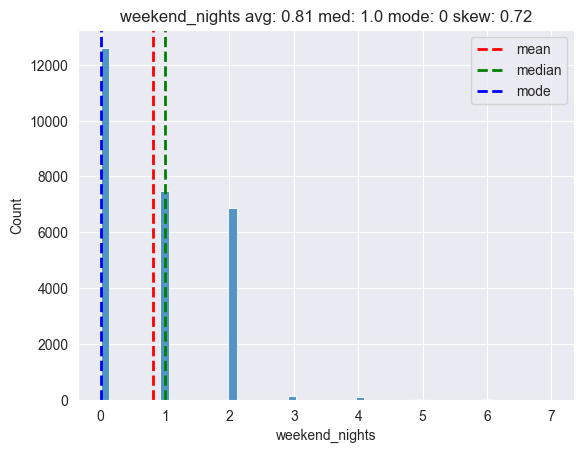

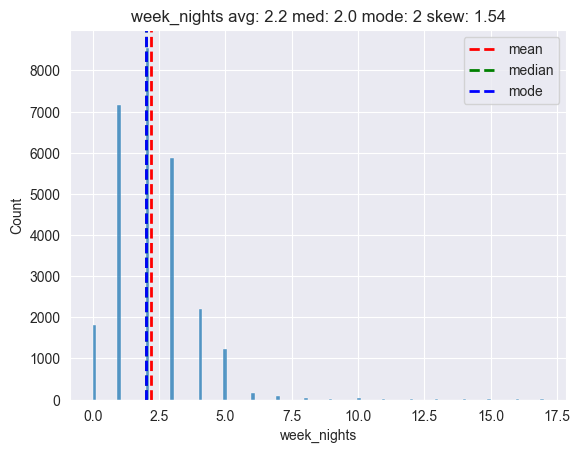

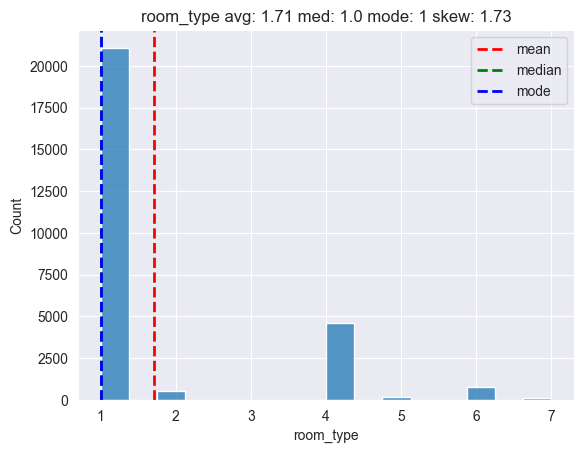

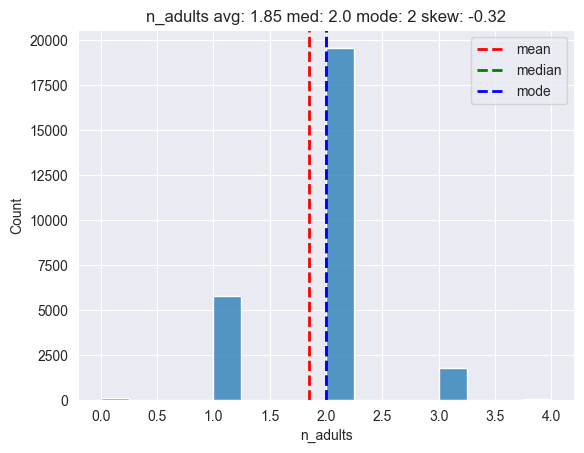

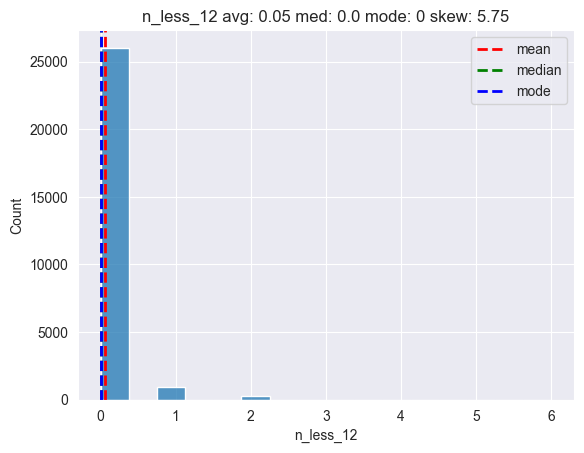

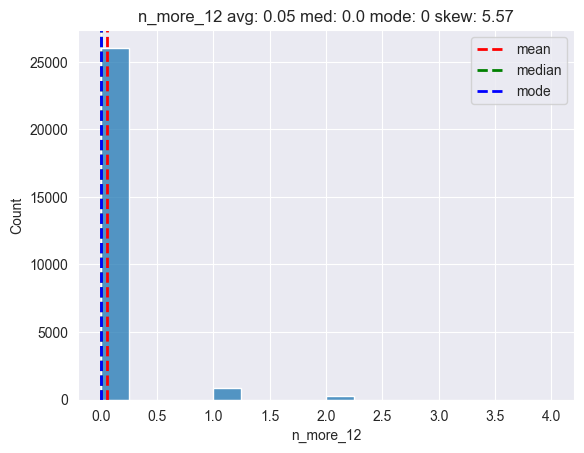

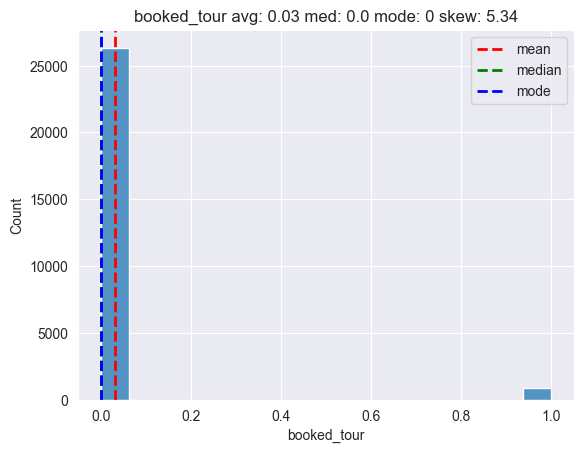

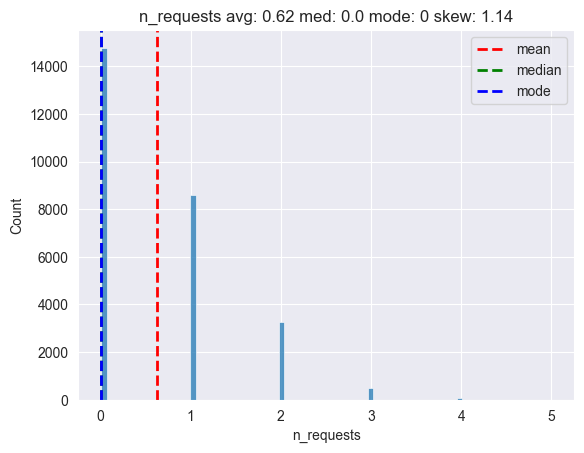

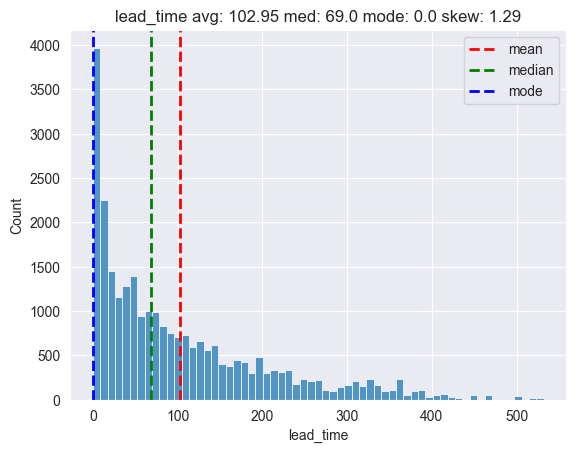

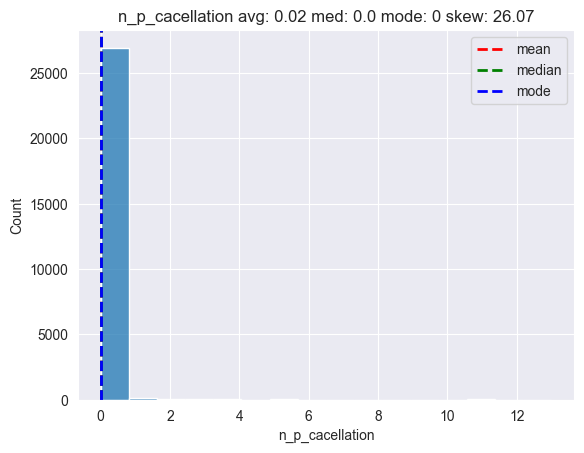

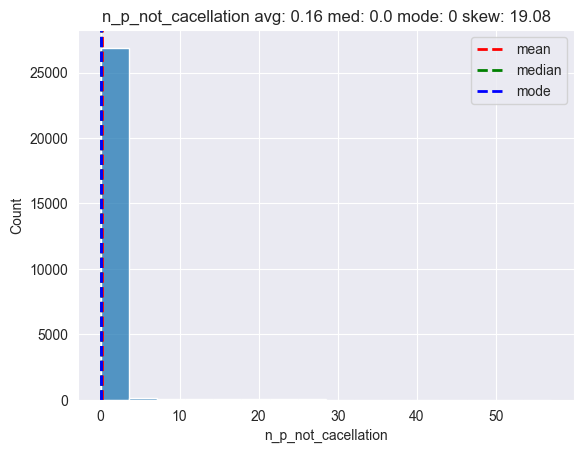

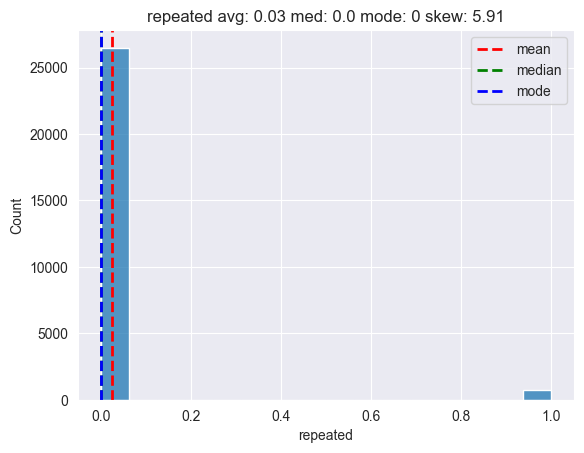

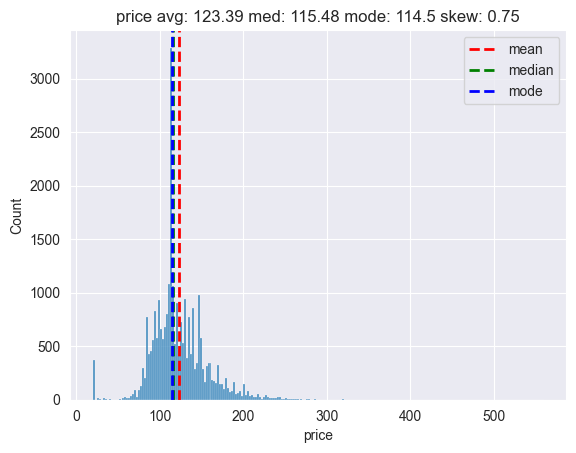

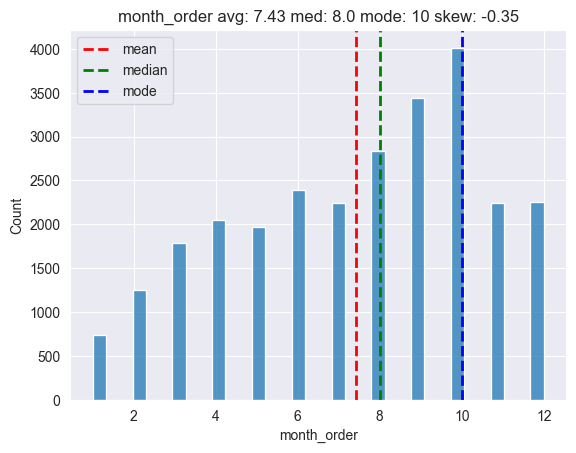

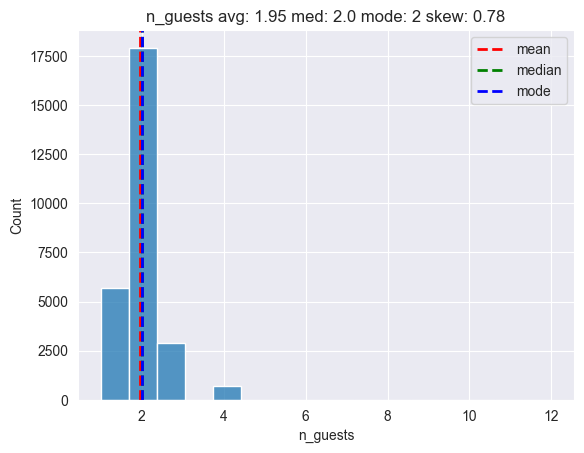

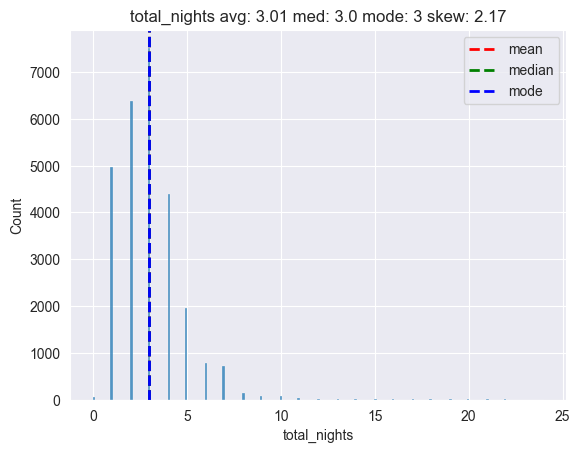

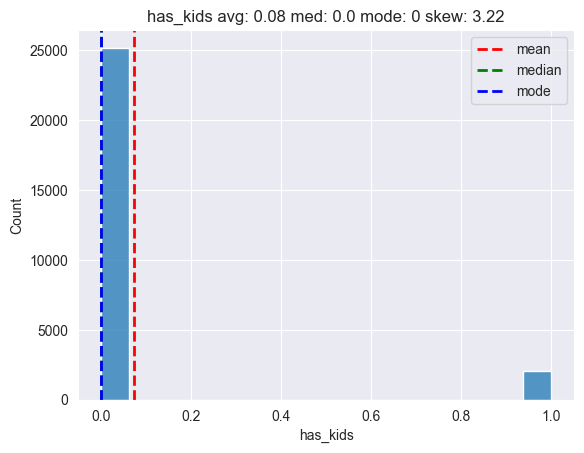

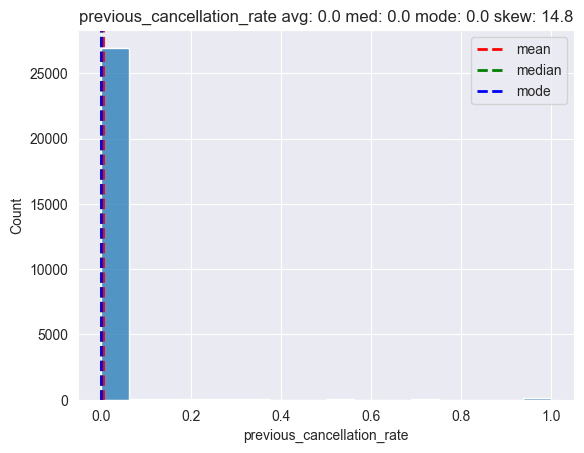

In [77]:
columns = df.columns
columns_to_plot = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
for col in columns_to_plot:
    sns.histplot(df[col])
    avg = df[col].mean()
    med = df[col].median()
    mode = df[col].mode()[0]
    skew = df[col].skew()
    plt.axvline(avg, color = 'r', linestyle = 'dashed', linewidth = 2, label = 'mean')
    plt.axvline(med, color = 'g', linestyle = 'dashed', linewidth = 2, label = 'median')
    plt.axvline(mode, color = 'b', linestyle = 'dashed', linewidth = 2, label = 'mode')
    plt.legend()
    plt.title(col + ' avg: ' + str(round(avg, 2)) + ' med: ' + str(round(med, 2)) + ' mode: ' + str(round(mode, 2)) + ' skew: ' + str(round(skew, 2)))
    plt.show()

In [ ]:
columns_to_plot = [col for col in columns if df[col].dtype == 'object' and col != 'ID' and col != 'date']
for col in columns_to_plot:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

Attributes correlation

In [ ]:
columns_to_corr = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
corr = df[columns_to_corr].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show()

Main insights:
cancellation:
- positively correlated with the lead time, and its reasonable as the more the lead time the more the chance of cancellation (unexpected events, change of plans, etc)
- negatively correlated with the number of requests, and its reasonable as the more the number of requests, the customer is more dependent on the hotel and less likely to cancel
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, the more satisfied he is and less likely to cancel
- positively correlated with the price, and its reasonable as the more the price the more the customer will be able to find a better deal and cancel

price:
- positively correlated with the room type, and its reasonable as the room is better the price is higher
- positively correlated with the number of guests, and its reasonable as the more the guests the more the price
- positively correlated with the number of requests, and its reasonable as the more the requests the more the price
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, he likely to get a discount
room type:
- positively correlated with the number of guests, and its reasonable as the more the guests the bigger the room

Visualizing the data

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='n_requests', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('number of requests')
plt.title('lead time vs number of requests')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='price', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('price')
plt.title('lead time vs price')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='month', y='lead_time', hue='is_canceled', data=df)
plt.xlabel('month')
plt.ylabel('lead time')
plt.title('month vs lead time')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_guests', y='price', hue='is_canceled', data=df)
plt.title('Number of Guests vs Price')
plt.xlabel('Number of Guests')
plt.ylabel('Price')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_p_cacellation', y='n_p_not_cacellation', hue='is_canceled', data=df)
plt.title('Number of Cancellations vs Number of Not Cancellations')
plt.xlabel('Number of Cancellations')
plt.ylabel('Number of Not Cancellations')
plt.show()

In [ ]:

plt.figure(figsize=(10, 10))
sns.countplot(x='purchase_type', hue='is_canceled', data=df)
plt.title('Purchase Type vs Cancellation')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='repeated', hue='is_canceled', data=df)
plt.title('Repeated vs Cancellation')
plt.xlabel('Repeated')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='board_type', hue='is_canceled', data=df)
plt.title('Board Type vs Cancellation')
plt.xlabel('Board Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='room_type', hue='is_canceled', data=df)
plt.title('Room Type vs Cancellation')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='n_requests', y='price', hue='is_canceled', data=df)
plt.title('Number of Requests vs Price')
plt.xlabel('Number of Requests')
plt.ylabel('Price')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='purchase_type', y='lead_time', hue='is_canceled', data=df)
plt.title('Purchase Type vs Lead Time')
plt.xlabel('Purchase Type')
plt.ylabel('Lead Time')
plt.legend(title='Is Canceled')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='n_less_12', hue='is_canceled', data=df)
plt.title('Kids less than 12 vs Cancellation')
plt.xlabel('Kids less than 12')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

adding new features

In [ ]:
#add total nights column
df['total_nights'] = df['weekend_nights'] + df['week_nights']

In [ ]:
#add has kids column
df['has_kids'] = ((df['n_less_12'] > 0) | (df['n_more_12'] > 0)).astype(int)

In [ ]:
#add check in day column
# Convert reservation_date to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate check-in date by adding lead_time to reservation_date
df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')

# Extract the day of the week for check-in date
df['check_in_day'] = df['check_in_date'].dt.day_name()

In [ ]:
#add check in month column
df['check_in_month'] = df['check_in_date'].dt.month


In [ ]:
df['previous_cancellation_rate'] = (df['n_p_cacellation'] / (df['n_p_cacellation'] + df['n_p_not_cacellation'])).round(2)
df['previous_cancellation_rate'] = df['previous_cancellation_rate'].fillna(0)



In [ ]:
df['is_holiday_season'] = np.where(df['check_in_month'].isin([12, 1, 7, 8]), 1, 0)
df

Visualizing the new features

In [ ]:
cancellation_rate_by_kids = df.groupby('has_kids')['is_canceled'].mean()
cancellation_rate_by_kids.plot(kind='bar', title='Cancellation Rate by Presence of Children')
plt.xlabel('Has Kids')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
cancellation_rate_by_month = df.groupby('check_in_month')['is_canceled'].mean()
cancellation_rate_by_month.plot(kind='bar', title='Cancellation Rate by Check-in Month')
plt.xlabel('Check-in Month')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
cancellation_rate_by_day = df.groupby('check_in_day')['is_canceled'].mean()
cancellation_rate_by_day = cancellation_rate_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
cancellation_rate_by_day.plot(kind='bar', title='Cancellation Rate by Check-in Day')
plt.xlabel('Check-in Day')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=10)
cancellation_rate_by_lead_time = df.groupby('lead_time_bins',observed=True)['is_canceled'].mean()
cancellation_rate_by_lead_time.plot(kind='bar', title='Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (binned)')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
df['total_nights'] = df['weekend_nights'] + df['week_nights']
cancellation_rate_by_total_nights = df.groupby('total_nights')['is_canceled'].mean()
cancellation_rate_by_total_nights.plot(kind='bar', title='Cancellation Rate by Total Nights')
plt.xlabel('Total Nights')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
cancellation_rate_by_tour = df.groupby('booked_tour')['is_canceled'].mean()
cancellation_rate_by_tour.plot(kind='bar', title='Cancellation Rate by Booked Tour')
plt.xlabel('Booked Tour')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
cancellation_rate_by_holiday = df.groupby('is_holiday_season')['is_canceled'].mean()
cancellation_rate_by_holiday.plot(kind='bar', title='Cancellation Rate by Holiday Season')
plt.xlabel('Is Holiday Season')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
cancellation_rate_by_previous_cancellation_rate = df.groupby('previous_cancellation_rate')['is_canceled'].mean()
cancellation_rate_by_previous_cancellation_rate.plot(kind='bar', title='Cancellation Rate by Previous Cancellation Rate')
plt.xlabel('Previous Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.show()

check correlation between the new features and other features

In [ ]:
columns = df.columns
columns_to_corr = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
corr = df[columns_to_corr].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show()

In [ ]:
#identify the features that have a correlation with the target variable
correlation_with_target = corr['is_canceled'].sort_values(ascending=False)
correlation_with_target

In [ ]:
# Identify highly correlated features
threshold = 0.6
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            high_corr_pairs.append((colname_i, colname_j))
            
high_corr_pairs

Main insights:
- the new features have a correlation with the target variable
- the new features have a correlation with other features, maybe we can drop some of them
- 

In [68]:
df = pd.read_csv('hotels_train.csv')
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')
df['date'] = pd.to_datetime(df['date'], format = 'mixed')
df['month_order'] = df['date'].dt.month.astype(int)
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']
# df['purchase_type'] = df['purchase_type'].astype('category')
df['is_canceled'] = df['is_canceled'].astype('category')
df['total_nights'] = df['weekend_nights'] + df['week_nights']
df['has_kids'] = ((df['n_less_12'] > 0) | (df['n_more_12'] > 0)).astype(int)
# df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')
# df['check_in_day'] = df['check_in_date'].dt.day_name()
# df['check_in_month'] = df['check_in_date'].dt.month
df['previous_cancellation_rate'] = (df['n_p_cacellation'] / (df['n_p_cacellation'] + df['n_p_not_cacellation'])).round(2)
df['previous_cancellation_rate'] = df['previous_cancellation_rate'].fillna(0)
# df['is_holiday_season'] = np.where(df['check_in_month'].isin([12, 1, 7, 8]), 1, 0)



lets found nan values

In [79]:
df.isnull().sum()

ID                              0
weekend_nights                  0
week_nights                     0
room_type                       0
board_type                      0
n_adults                        0
n_less_12                       0
n_more_12                       0
booked_tour                     0
n_requests                      0
lead_time                     419
purchase_type                   0
n_p_cacellation                 0
n_p_not_cacellation             0
repeated                        0
price                           0
date                            0
is_canceled                     0
month_order                     0
n_guests                        0
total_nights                    0
has_kids                        0
previous_cancellation_rate      0
dtype: int64

In [ ]:
df['board_type'].value_counts()

In [70]:
df['board_type'] = df['board_type'].fillna('Missing')

In [ ]:
df['purchase_type'].value_counts()

In [71]:
df['purchase_type'] = df['purchase_type'].fillna('Missing')

In [ ]:
df.isnull().sum() 

In [ ]:
df[df.isnull().sum(axis=1)==4]

lead time - lets plot some rows with nan values

In [ ]:
df[df['lead_time'].isnull()]

plot box plot price as function of room type

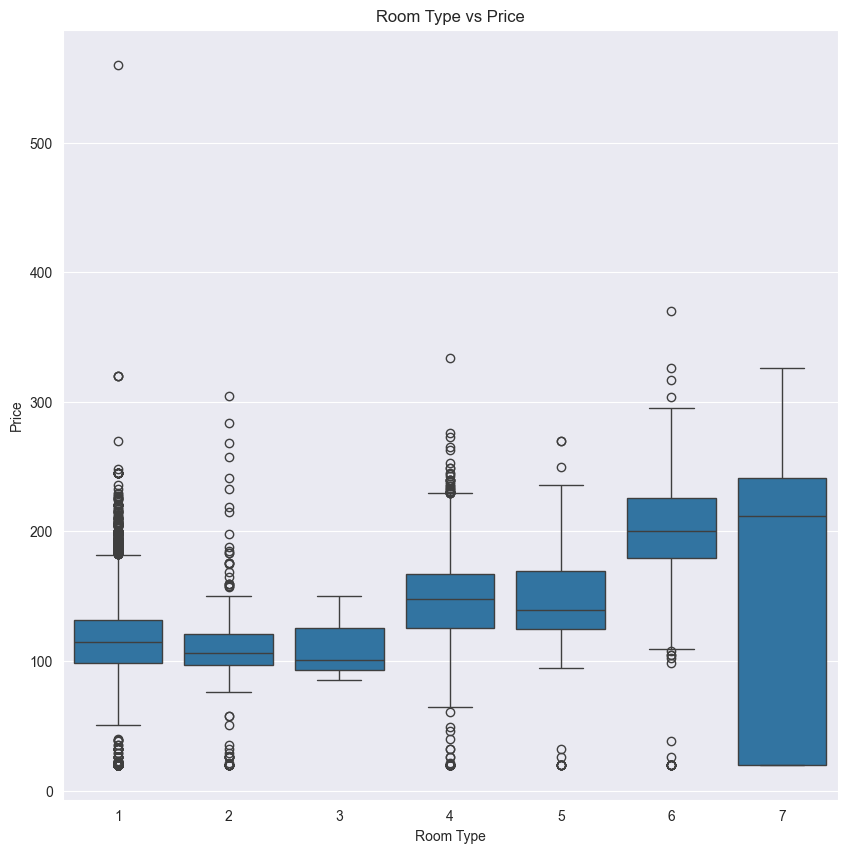

In [72]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

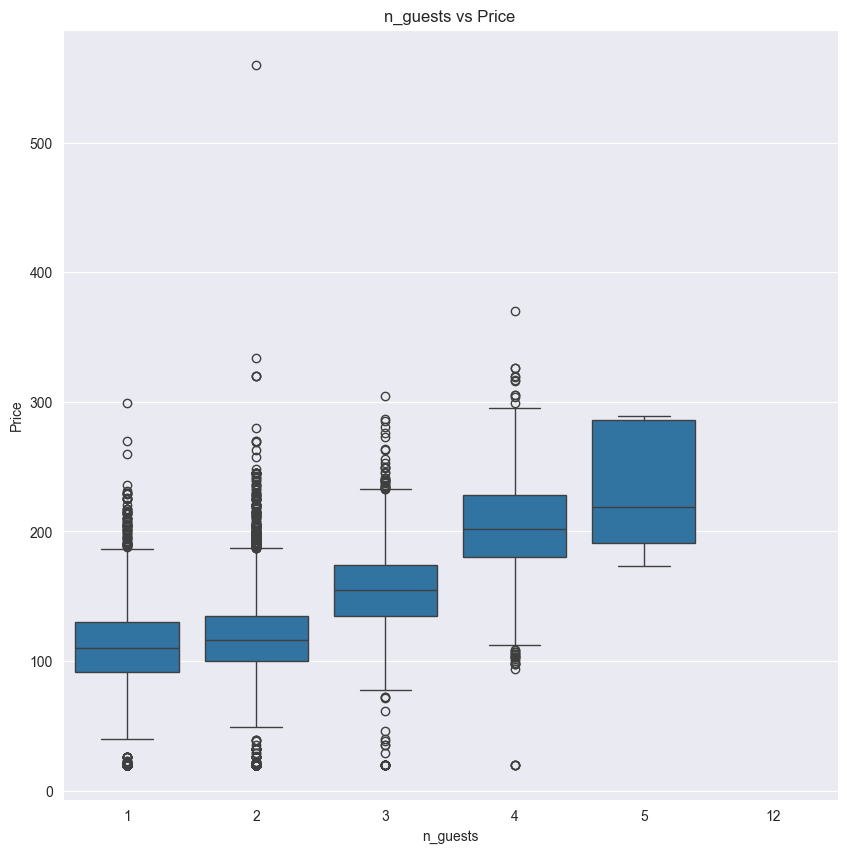

In [74]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='n_guests', y='price', data=df)
plt.title('n_guests vs Price')
plt.xlabel('n_guests')
plt.ylabel('Price')
plt.show()

lets fill the nan values of price by the mean of the room type and n_guests median

In [84]:
df['price'] = df['price'].fillna(df.groupby('room_type')['price'].transform('median'))
table = df.pivot_table(values='price', index='room_type', columns='n_guests', aggfunc='median')
table

n_guests,1,2,3,4,5,12
room_type,,,,,,
1,110.9,114.500,134.7500,142.00,NaN,NaN
2,105.5,105.855,102.3975,108.77,105.855,NaN
3,85.0,125.375,NaN,NaN,NaN,NaN
4,136.0,142.400,160.0000,167.59,NaN,147.65
5,128.9,139.400,139.4000,157.70,NaN,NaN
6,200.2,178.000,197.3000,200.20,194.675,NaN
7,20.0,20.000,218.4700,232.66,252.640,NaN


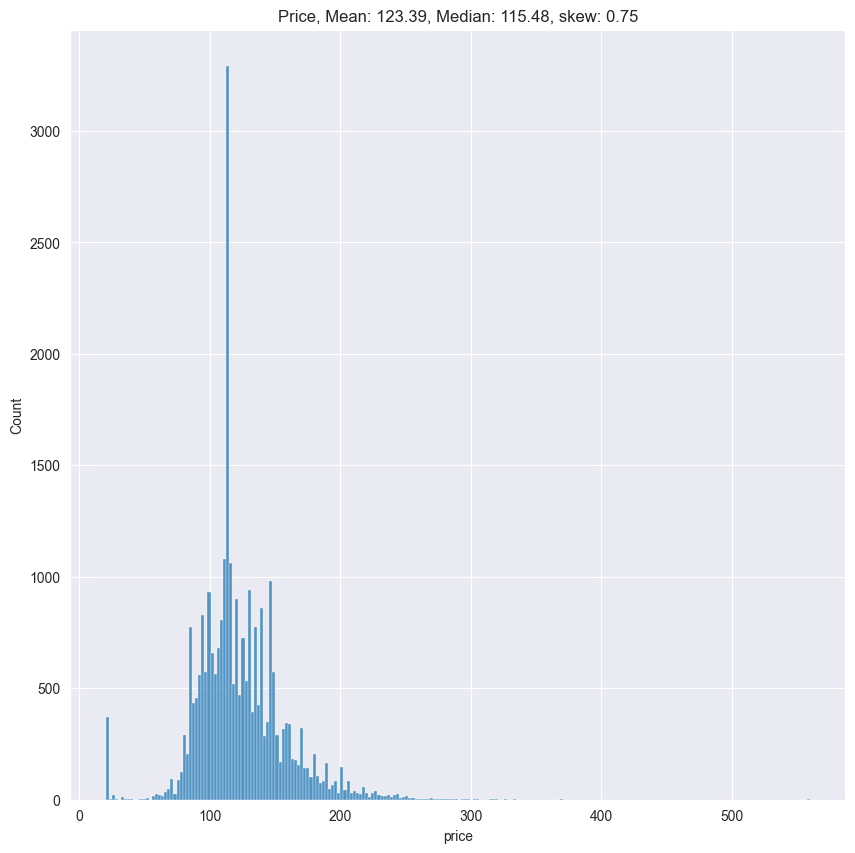

In [78]:
plt.figure(figsize = (10, 10))
sns.histplot(df['price'])
plt.title('Price, Mean: {}, Median: {}, skew: {}'.format(round(df['price'].mean(), 2), round(df['price'].median(), 2), round(df['price'].skew(), 2)))
plt.show()

lets drop all the lead time nan values

In [80]:
df = df.dropna(subset=['lead_time'])

In [81]:
df.isnull().sum()

ID                            0
weekend_nights                0
week_nights                   0
room_type                     0
board_type                    0
n_adults                      0
n_less_12                     0
n_more_12                     0
booked_tour                   0
n_requests                    0
lead_time                     0
purchase_type                 0
n_p_cacellation               0
n_p_not_cacellation           0
repeated                      0
price                         0
date                          0
is_canceled                   0
month_order                   0
n_guests                      0
total_nights                  0
has_kids                      0
previous_cancellation_rate    0
dtype: int64

In [85]:
df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')
df['check_in_day'] = df['check_in_date'].dt.day_name()
df['check_in_month'] = df['check_in_date'].dt.month
df['is_holiday_season'] = np.where(df['check_in_month'].isin([12, 1, 7, 8]), 1, 0)
df['board_type'] = df['board_type'].astype('category')
df['purchase_type'] = df['purchase_type'].astype('category')

In [92]:
df = df.drop(['ID', 'date', 'check_in_date'], axis=1)

data normalization

In [86]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


In [93]:
test = pd.read_csv('hotels_test.csv')
print(test.shape)
test['room_type'] = test['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)
test['date'] = test['date'].replace('2018-2-29', '2018-3-1')
test['date'] = pd.to_datetime(test['date'], format = 'mixed')
test['month_order'] = test['date'].dt.month.astype(int)
test['n_guests'] = test['n_adults'] + test['n_less_12'] + test['n_more_12']
test['total_nights'] = test['weekend_nights'] + test['week_nights']
test['has_kids'] = ((test['n_less_12'] > 0) | (test['n_more_12'] > 0)).astype(int)
test['previous_cancellation_rate'] = (test['n_p_cacellation'] / (test['n_p_cacellation'] + test['n_p_not_cacellation'])).round(2)
test['previous_cancellation_rate'] = test['previous_cancellation_rate'].fillna(0)
test['board_type'] = test['board_type'].fillna('Missing')
test['purchase_type'] = test['purchase_type'].fillna('Missing')
test = test.dropna(subset=['lead_time'])
test['price'] = test['price'].fillna(df.groupby('room_type')['price'].transform('median'))
test['check_in_date'] = test['date'] + pd.to_timedelta(test['lead_time'], unit='d')
test['check_in_day'] = test['check_in_date'].dt.day_name()
test['check_in_month'] = test['check_in_date'].dt.month
test['is_holiday_season'] = np.where(test['check_in_month'].isin([12, 1, 7, 8]), 1, 0)
test['board_type'] = test['board_type'].astype('category')
test['purchase_type'] = test['purchase_type'].astype('category')
test = test.drop(['ID', 'date', 'check_in_date'], axis=1)

(9072, 17)


In [94]:
print(test.shape)

(8947, 23)


In [95]:
# Define column selectors
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data and transform the training data
df_train_normalized = preprocessor.fit_transform(df)

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

# Transform the test data using the same preprocessor
df_test_normalized = preprocessor.transform(test)

# Optionally convert the result back to a DataFrame
df_train_normalized = pd.DataFrame(df_train_normalized, columns=preprocessor.get_feature_names_out())
df_test_normalized = pd.DataFrame(df_test_normalized, columns=preprocessor.get_feature_names_out())


In [96]:
print(df_train_normalized.shape)
print(df_test_normalized.shape)

(26794, 27)
(8947, 27)


In [97]:
df.head()

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,...,price,is_canceled,month_order,n_guests,total_nights,has_kids,previous_cancellation_rate,check_in_day,check_in_month,is_holiday_season
0,1,5,1,half board,2,0,0,0,2,34.0,...,108.4,0,11,2,6,0,0.0,Tuesday,1,1
1,0,3,1,Missing,2,0,0,0,0,365.0,...,114.5,1,11,2,3,0,0.0,Sunday,11,0
2,0,2,4,half board,1,0,0,0,1,148.0,...,137.3,0,5,1,2,0,0.0,Monday,10,0
3,1,2,1,Missing,2,0,0,0,0,502.0,...,127.0,1,9,2,3,0,0.0,Monday,2,0
4,1,3,4,half board,2,0,1,0,2,32.0,...,110.0,0,10,3,4,1,0.0,Monday,11,0
